# Background of the Study

In [66]:
#Importing the libraries for loading and manipulating the data
import pandas as pd
import numpy as np
#Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Importing train, test, split
from sklearn.model_selection import train_test_split
#Importing different classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [1]:
pwd

'C:\\Users\\HP'

In [67]:
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [248]:
#loading the dataset
tita_tr = pd.read_csv("train.csv")
tita_te = pd.read_csv("test.csv")

In [249]:
#copying the dataset, so the originial dataset remain untouched
titar = tita_tr.copy()
titat = tita_te.copy()

In [250]:
#Checking the first 5 columns of the data
titar.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- There are columns of passenger id, passenger class, passenger name, sex , age, ticket a, fare, cabin, embarked
- passenger id, namel tioicket, sibsp, parch will not play any role in model building and 
- Survived is the column, which consist our label data
- Sex, AGe, Fare, Embarked, Pclass are probable predictors to define our target variable

In [71]:
#Checking the shape of the data
titar.shape

(891, 12)

- In this dataset, there are 891 rows and 12 columns
- there are unnecessary columns like passenger ID, name, sibsp, parch, ticket, which will not play role in model building and predicting

In [140]:
# checkingthe null values in the dataset
titar.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are missing values in column Age, Cabin and Embarked, which we have to treat.

In [34]:
#Checking the unique values in cabin
titar["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

- There are many categories of cabin, so I am deciding to drop also this column, it will be difficult to build a relationship with our label column

In [141]:
titar.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Mean age is 29 
- 

In [142]:
Q1 = titar.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = titar.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [143]:
(
    (titar.select_dtypes(include=["float64", "int64"]) < lower)
    | (titar.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(titar) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Age             1.234568
SibSp           5.162738
Parch          23.905724
Fare           13.019080
dtype: float64

In [116]:
titar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- We see the wrong datatypes, like Passenger ID, Survived, Pclass, Sibsp, Parch, they should be classified as category column- passenger Id is integer
- survived, pclass,  are integer,
- Sex, Embarked should be category
- 

# Explotatory Data Analysis

In [144]:
#Function to create histplot and boxplot together
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

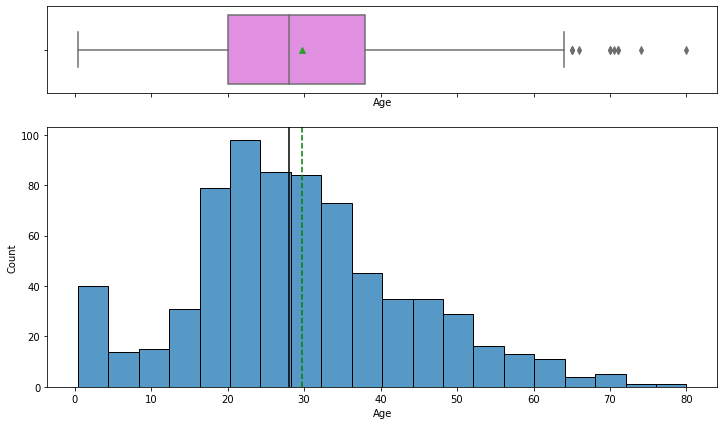

In [145]:
histogram_boxplot(titar, "Age")

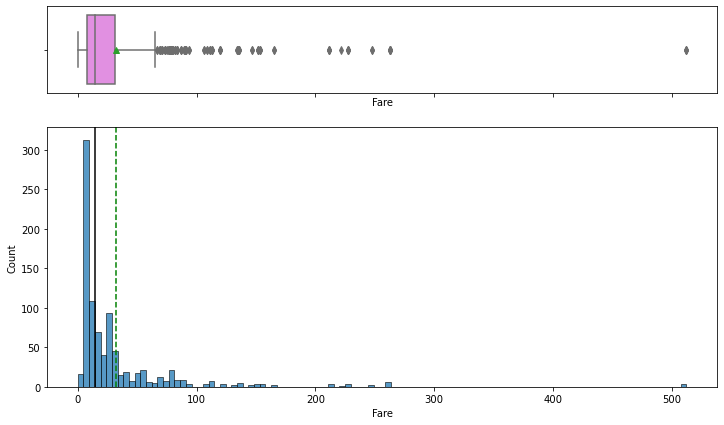

In [146]:
histogram_boxplot(titar, "Fare")

In [147]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

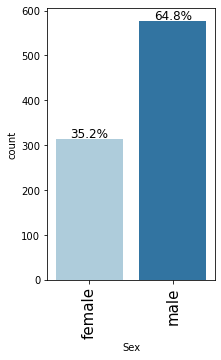

In [149]:
labeled_barplot(titar, "Sex", perc=True)

- there were more male passengers than female passenegers

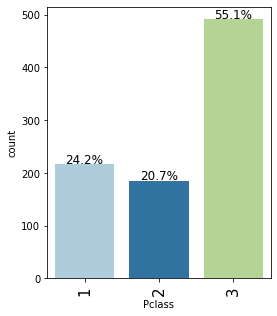

In [150]:
labeled_barplot(titar, "Pclass", perc=True)

- In Titanic there are more than 55 pessenger with normal class
- and the rest was almost equally divided in first and second categories

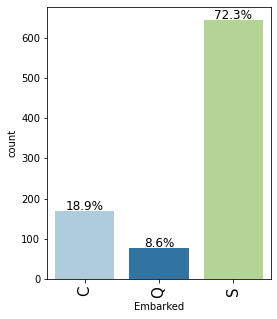

In [151]:
labeled_barplot(titar, "Embarked", perc=True)

- Southampton, Cherbourg, and Queenstown
- 72 pecent of passengers were from Southtampton
- and the rest were form Cherbourg and Queenstown

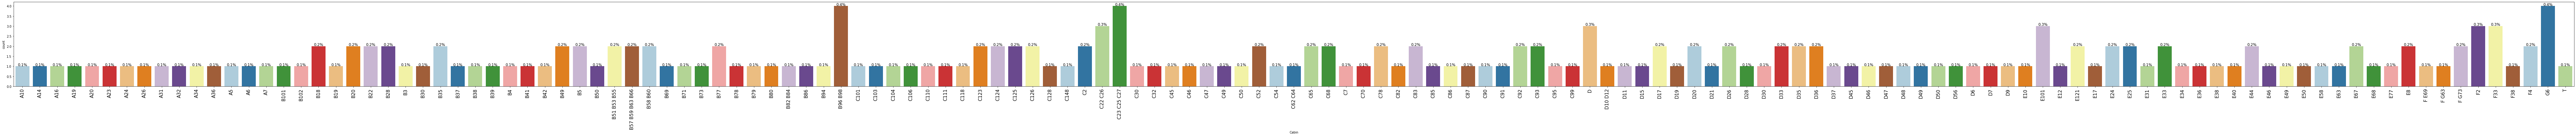

In [152]:
labeled_barplot(titar, "Cabin", perc=True)

In [153]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Survived    0    1  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
------------------------------------------------------------------------------------------------------------------------


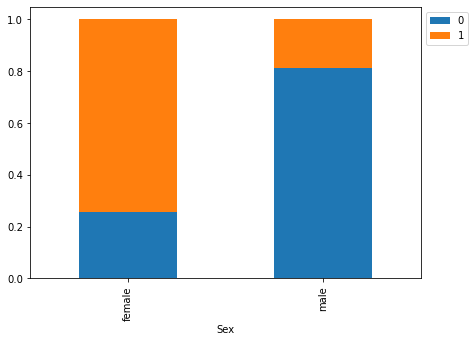

In [154]:
stacked_barplot(titar, "Sex", "Survived")

- Among male pessengers only survived 109
- among female pessengers 233 were survived, almost 75 percent 

Survived    0    1  All
Pclass                 
All       549  342  891
1          80  136  216
3         372  119  491
2          97   87  184
------------------------------------------------------------------------------------------------------------------------


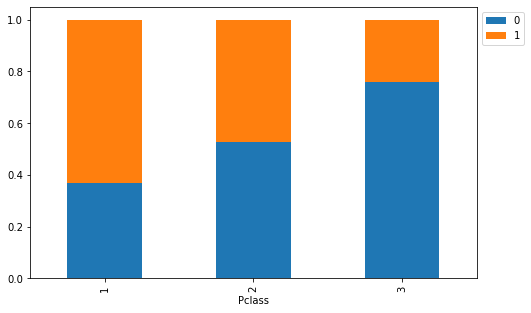

In [155]:
stacked_barplot(titar, "Pclass", "Survived")

- almost 60 percent of 1st class has survived
- 50 percent of 2nd class passenger have survived
- only 20 percent of passenger from 3rd class have survived

Survived    0    1  All
Embarked               
All       549  340  889
S         427  217  644
C          75   93  168
Q          47   30   77
------------------------------------------------------------------------------------------------------------------------


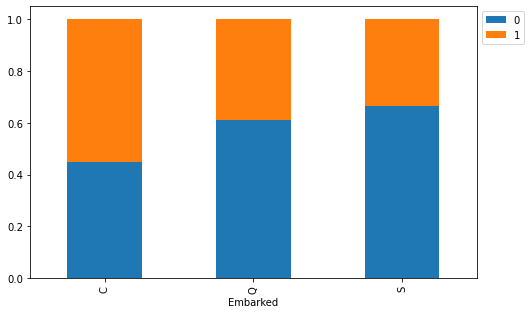

In [156]:
stacked_barplot(titar, "Embarked", "Survived")

- The passenger from Cherbourg has almost 60 percent have survived
- the passenger who embarked from other two cities around 30 percent survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

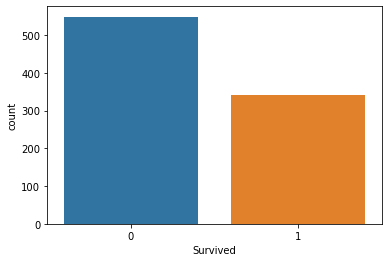

In [27]:
sns.countplot(titar["Survived"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

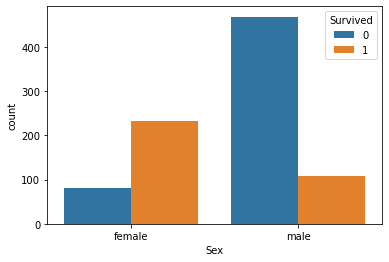

In [32]:
sns.countplot(x="Sex", hue="Survived", data=titar)

# Histogram of X

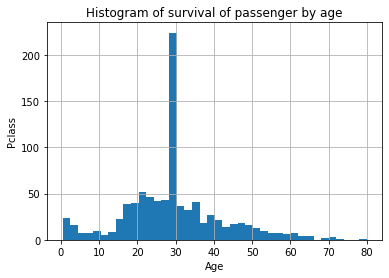

In [14]:
#titar.Age.hist(bins=40)
#plt.xlabel("Age")
#plt.ylabel("Pclass")
#plt.title("Histogram of survival of passenger by age")
#plt.show()

p = sns.violinplot(data = titar, x = 'Survived', y = 'Age')
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);

z=sns.violinplot(data=titar, x="Survived", y="Age")
p.set(title = "Age Distribution by Survival",
      xlabel = "Survival",
      ylabel = "Age Ditribution",
      xticklabels = ["Died", "Survived"]);

titar[(titar.Survived == 1) & (titar.Age == 80)].mean()/100

titar[(titar.Survived == 1) & (titar.Pclass == 1)]

titar[(titar.Survived == 1) & (titar.Pclass == 2)]

ps=titar[(titar.Survived == 1) & (titar.Pclass == 1)]
print(ps)

titar.groupby('Survived').Age.describe().unstack(level=0)

titar.apply(lambda x: x.isnull().value_counts())

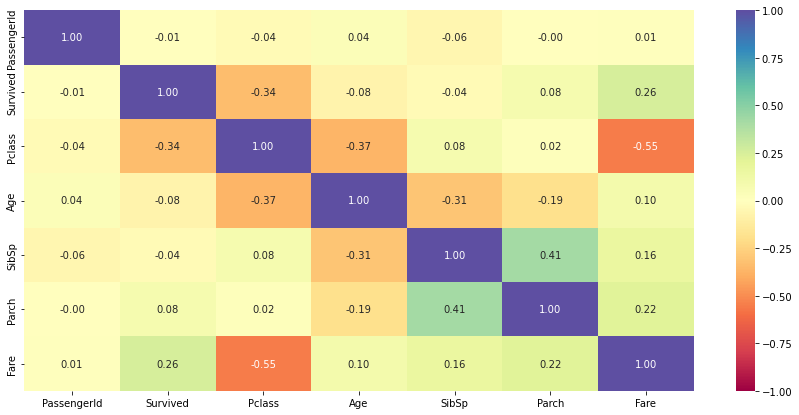

In [157]:
plt.figure(figsize=(15, 7))
sns.heatmap(titar.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Age and Survived are negatively correlated
- Age and Pclass are negative correlated. Aged Peopled were in higher Passenger class
- Pclass are also negatively correlated

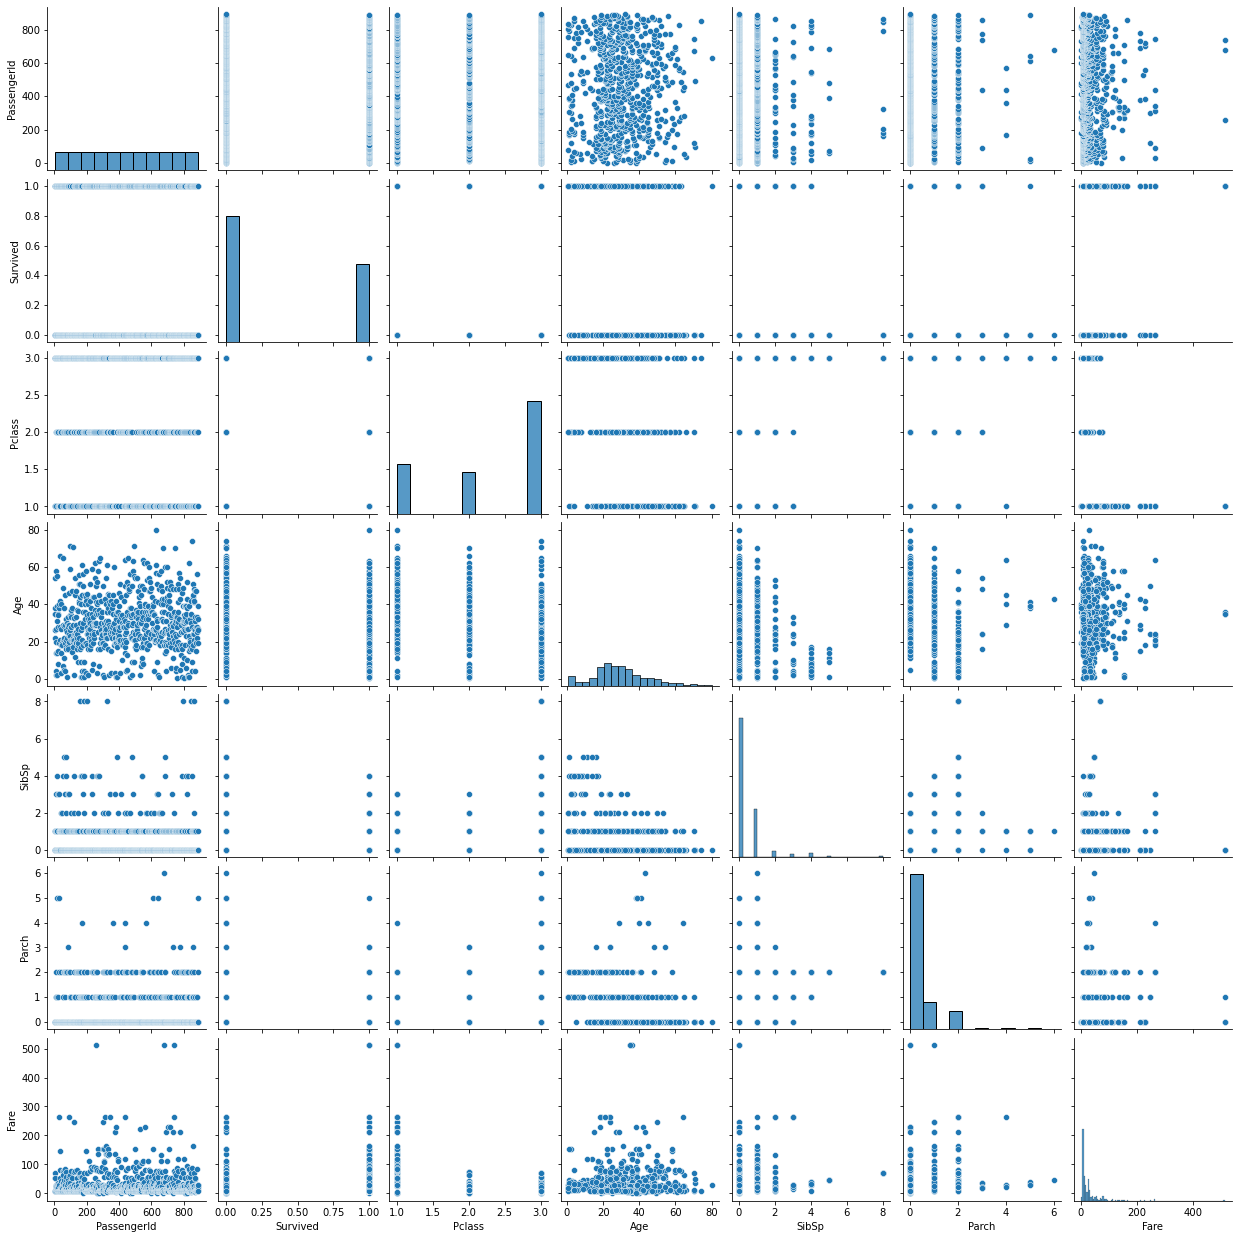

In [158]:
sns.pairplot(titar)

# Preparing the Data

In [251]:
# Dropping the unneseccary columns from the dataset
titar.drop(
    ["Name", "Ticket", "Parch", "SibSp", "Cabin"], inplace=True, axis=1
)

In [160]:
cat_col = ["Pclass", "Survived", "Sex", "Embarked"]

In [161]:
titar[cat_col] = titar[cat_col].astype("category")

In [252]:
titar["PassengerId"]=titar["PassengerId"].astype("str")

# Splitting the Dataset

In [253]:
X = titar.drop("Survived", axis=1)
y = titar.pop("Survived")

In [254]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Imputation using simpule imputer

In [255]:
si = SimpleImputer(strategy="most_frequent")

In [256]:
imp_col = ["Age", "Embarked"]

In [257]:
X_train[imp_col] = si.fit_transform(X_train[imp_col])

In [258]:
X_test[imp_col] = si.fit_transform(X_test[imp_col])

In [259]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

# Encoding of the Sex and Embarked columns

In [ ]:
#get_dummies for Sex Column

In [260]:
X_train["Sex"] = pd.get_dummies(X_train["Sex"], drop_first=True)

In [261]:
X_test["Sex"] = pd.get_dummies(X_test["Sex"], drop_first=True)

In [ ]:
#One Hot Encoding for Embarked Column

In [262]:
embarked_encoder = LabelEncoder()

In [263]:
X_train["Embarked"] = embarked_encoder.fit_transform(X_train["Embarked"])

In [264]:
X_test["Embarked"] = embarked_encoder.fit_transform(X_test["Embarked"])

In [265]:
X_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
748,749,1,1,19.0,53.1000,2
45,46,3,1,22.0,8.0500,2
28,29,3,0,22.0,7.8792,1
633,634,1,1,22.0,0.0000,2
403,404,3,1,28.0,15.8500,2


# Building the Model with differet Classifier

# Logistic Regression

In [266]:
l = LogisticRegression(random_state=42)

In [267]:
model_l=l.fit(X_train, y_train)

In [268]:
model_l.score(X_train, y_train)

0.8009630818619583

In [269]:
model_l.score(X_test, y_test)

0.7723880597014925

In [270]:
model_l.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

# Random Forest Classifier

In [271]:
r = RandomForestClassifier(random_state=42)

In [272]:
model_r=r.fit(X_train, y_train)

In [273]:
model_r.score(X_train, y_train)

1.0

In [274]:
model_r.score(X_test, y_test)

0.8171641791044776

- I will play with model as it giving better on train data, however on test data performence is poor, model is sufering from overfitting. 

In [275]:
r1 = RandomForestClassifier(max_depth=8, min_samples_leaf=7, random_state=42)

In [276]:
model_r1=r1.fit(X_train, y_train)

In [277]:
model_r1.score(X_train, y_train)

0.8667736757624398

In [278]:
model_r1.score(X_test, y_test)

0.8134328358208955

In [ ]:
#Hypertuned model of random forest 

In [279]:
r2 = RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [280]:
model_r2=r2.fit(X_train, y_train)

In [281]:
model_r2.score(X_train, y_train)

0.8828250401284109

In [282]:
model_r2.score(X_test, y_test)

0.7947761194029851

- My model model_r1 is giving the best score so far and also the gap between train and test data is not high. 

IndexError: list index out of range

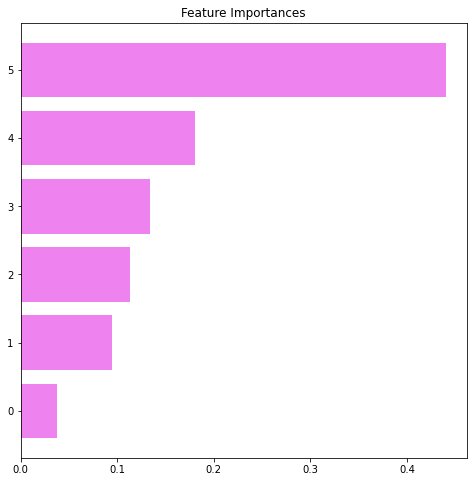

In [283]:
importances = model_r1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Decision Tree Classifer

In [284]:
d = DecisionTreeClassifier(criterion="gini", random_state=42)

In [285]:
model_d=d.fit(X_train, y_train)

In [286]:
model_d.score(X_train, y_train)

1.0

In [287]:
model_d.score(X_test, y_test)

0.7201492537313433

In [ ]:
#Hyperparameter Tunning on DecisionTree model

In [288]:
d1 = DecisionTreeClassifier(criterion="gini", max_depth=20, min_samples_leaf=3, max_leaf_nodes=10, random_state=42
)

In [289]:
model_d1=d1.fit(X_train, y_train)

In [290]:
model_d1.score(X_train, y_train)

0.8475120385232745

In [291]:
model_d1.score(X_test, y_test)

0.7761194029850746

In [207]:
d1.feature_importances_

array([0.17606789, 0.60974333, 0.11996069, 0.09422809, 0.        ])

In [208]:
list(zip(d1.feature_importances_, X_train.columns))

[(0.17606788845147994, 'Pclass'),
 (0.6097433270878141, 'Sex'),
 (0.11996069079536636, 'Age'),
 (0.09422809366533955, 'Fare'),
 (0.0, 'Embarked')]

In [209]:
feature_names = list(X_train.columns)

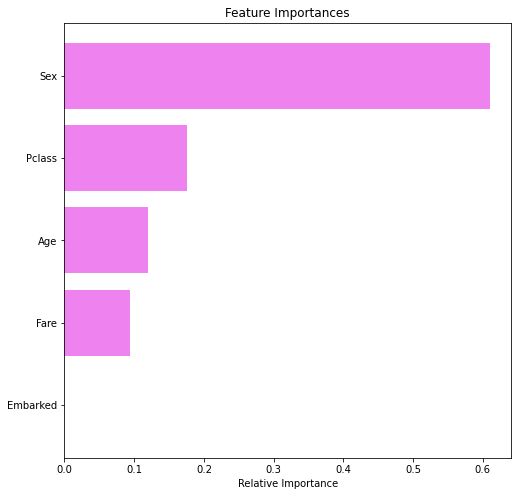

In [210]:
importances = model_d1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Predicting using the best model

In [292]:
model_r1.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [293]:
test_f=pd.read_csv("test.csv")

In [294]:
test_f.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [295]:
# Dropping the unneseccary columns from the dataset
test_f.drop(
    ["Name", "Ticket", "Parch", "SibSp", "Cabin"], inplace=True, axis=1
)

In [296]:
cat_col = ["Pclass", "Sex", "Embarked"]

In [297]:
test_f[cat_col]=test_f[cat_col].astype("category")

In [298]:
test_f["PassengerId"]=test_f["PassengerId"].astype("str")

In [299]:
test_f.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
dtype: int64

In [300]:
si = SimpleImputer(strategy="most_frequent")

In [301]:
imp_col=[ "Age", "Fare"]

In [302]:
test_f[imp_col] = si.fit_transform(test_f[imp_col])

In [303]:
test_f["Sex"] = pd.get_dummies(test_f["Sex"], drop_first=True)

In [304]:
test_f["Embarked"] = embarked_encoder.fit_transform(test_f["Embarked"])

In [305]:
test_f.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,1
1,893,3,0,47.0,7.0000,2
2,894,2,1,62.0,9.6875,1
3,895,3,1,27.0,8.6625,2
4,896,3,0,22.0,12.2875,2


In [306]:
pred=model_r1.predict(test_f)

In [307]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [308]:
pred_f=pd.DataFrame(pred)

In [309]:
pred_f

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [310]:
pas_id=test_f.iloc[: , :1]
pas_id

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [314]:
frames= [pred_f, pas_id]

In [320]:
result_f = pd.concat([pas_id, pred_f], join="outer", axis=1, ignore_index=True)

In [323]:
result_f.head(5)

,0,1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [326]:
result_f.to_csv("titanic_fin.csv", index=False)

In [327]:
pwd

'C:\\Users\\HP'

# Making Pipeline

In [162]:
from sklearn.pipeline import make_pipeline

In [164]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_features=["Age", "Fare"]

In [165]:
numeric_transformer = make_pipeline(
     SimpleImputer(strategy="mean"),
     StandardScaler()
    )

In [167]:
categorical_features=[]
categorical_transformer=OneHotEncoder(handle_unknown="ignore")

In [168]:
def name_length(df):
    length = df[df,columns[0]].str.len()
    return length.values.reshape(-1,1)

In [172]:
from sklearn.preprocessing import FunctionTransformer

In [174]:
preprocessor = ColumnTransformer(
    transformers =[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('name', FunctionTransformer(name_length), ['Name'])
    ],
    remainder = "passthorugh")

In [175]:
pipeline=make_pipeline((preprocessor, LogisticRegression(max_iter=300)))

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '(ColumnTransformer(remainder='passthorugh',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 []),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x0000023C02359940>),
                                 ['Name'])]), LogisticRegression(max_iter=300))' (type <class 'tuple'>) doesn't

In [176]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=y)

ValueError: 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1] cannot be used to seed a numpy.random.RandomState instance

In [177]:
pipeline.fit(X_train, y_train)

NameError: name 'pipeline' is not defined

In [178]:
print("model Score: %3f" %pipeline.score(X_test, y_test))

NameError: name 'pipeline' is not defined

In [140]:
print(pipeline.predict(X_test))

NameError: name 'pipeline' is not defined

In [179]:
print(pipeline.predict_proba(X_test)[:, 1])

NameError: name 'pipeline' is not defined

In [180]:
%load_ext nb_black

<IPython.core.display.Javascript object>